In [2]:
import numpy as np
import math
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from urllib import urlretrieve
import tarfile
import os
import io
import re
from sklearn.feature_extraction.text import CountVectorizer
import math
from sklearn.metrics import accuracy_score, average_precision_score, precision_score,recall_score,roc_curve,precision_recall_curve, auc,f1_score, confusion_matrix
import operator

In [3]:
def read_input(filename):
    input_data=[];
    f=open(filename);
    #f.readline();
    #f.readline();
    for line in f:
        input_data.append(line.rstrip('\n').split(','));
    return input_data;

def create_feature_matrix(input_data):
    x_list=[a[0:len(input_data[0])-1] for a in input_data];
    x=np.matrix(x_list);
    #x=np.transpose(x)
    return x.astype(np.float);

def create_y_matrix(input_data):
    y_list=[a[len(input_data[0])-1] for a in input_data];
    y_list_1=[];
    for i in y_list:
        if(i=='Iris-setosa'):
            y_list_1.append(1);
        elif(i=='Iris-versicolor'):
            y_list_1.append(2);
        elif(i=='Iris-virginica'):
            y_list_1.append(3);
        
            
    y=np.matrix(y_list_1);
    y=np.transpose(y)
    return y.astype(np.float);
    #return y


In [4]:
#input_data=read_input('winequality-red.csv')
input_data=read_input('iris.dat')
X=create_feature_matrix(input_data)
Y=create_y_matrix(input_data)

In [5]:
def read_dimension_class(X,Y, ndimension, classarray):
    l=0;
    for i in classarray:
        for j in range(Y.shape[0]):
            if(Y[j,0]==i or Y[j,0]==i):
                l=l+1;
    X1=np.zeros([l,ndimension]);
    Y1=np.zeros([l,1]);
    for i in classarray:
        for j_row in range(Y.shape[0]):
            for j_col in range(ndimension):
                if(Y[j_row,0]==i or Y[j_row,0]==i):
                    X1[j_row,j_col]=X[j_row,j_col];
                    Y1[j_row,0]=Y[j_row];
    return X1, Y1;

In [6]:
def calc_muu(X1, Y1, classarray):
    muu_class=[];
    muu_class_1=0;
    mj1=0;
    for c in classarray:
        for i in range(Y1.shape[0]):
            if(Y1[i,0]==c):
                muu_class_1=muu_class_1 + X1[i];
                mj1=mj1+1;
        muu_class.append(muu_class_1 / mj1);
        muu_class_1=0;
        mj1=0;
    return muu_class;

In [7]:
def calc_sigma(X1, Y1, muu_class, classarray):
    sigma_class_1= np.zeros([X1.shape[1],X1.shape[1]]); 
    mj1=0;
    sigma_class=[];
    for c in range(len(classarray)):
        for i in range(Y1.shape[0]):
            if(Y1[i]==classarray[c]):
                sigma_class_1= sigma_class_1+np.dot(np.transpose(X1[i]-np.matrix(muu_class[c])),
                                                           (X1[i]-np.matrix(muu_class[c])));
                mj1=mj1+1;
        sigma_class.append(sigma_class_1 / mj1);
        sigma_class_1=0;
        mj1=0;
    return sigma_class;

In [8]:
X1, Y1= read_dimension_class(X,Y,1,[1,2])
muu_class = calc_muu(X1, Y1,[1,2])
print "1 feature 2 class"
print "Mean:" , muu_class[0], muu_class[1]
sigma_class = calc_sigma(X1, Y1,muu_class,[1,2])
print "Standard Deviation:" ,sigma_class[0][0], sigma_class[1][0]
X1, Y1= read_dimension_class(X,Y,4,[1,2])
muu_class = calc_muu(X1, Y1,[1,2])
print "n feature 2 class"
print "Mean:", muu_class[0], muu_class[1]
sigma_class = calc_sigma(X1, Y1,muu_class,[1,2])
print "Standard Deviation:" , sigma_class[0][0], sigma_class[1][0]
X1, Y1= read_dimension_class(X,Y,4,[1,2,3])
print "n feature n class"
muu_class = calc_muu(X1, Y1,[1,2,3])
print "Mean:", muu_class[0], muu_class[1], muu_class[2]
sigma_class = calc_sigma(X1, Y1,muu_class,[1,2,3])
print "Standard Deviation:"
print sigma_class[0]
print sigma_class[1]
print sigma_class[2]

1 feature 2 class
Mean: [ 5.006] [ 5.936]
Standard Deviation: [[ 0.121764]] [[ 0.261104]]
n feature 2 class
Mean: [ 5.006  3.418  1.464  0.244] [ 5.936  2.77   4.26   1.326]
Standard Deviation: [[ 0.121764  0.098292  0.015816  0.010336]] [[ 0.261104  0.08348   0.17924   0.054664]]
n feature n class
Mean: [ 5.006  3.418  1.464  0.244] [ 5.936  2.77   4.26   1.326] [ 6.588  2.974  5.552  2.026]
Standard Deviation:
[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]
[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]
[[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]


In [9]:
def prior_probability(Y1, classarray):
    mj=0;
    priors=[]
    for c in classarray:
        for i in range(Y1.shape[0]):
            if(Y1[i]==c):
                   mj=mj+1;
        priors.append(1.*(mj)/Y1.shape[0]);
        mj=0;
    return priors;

In [10]:
def membership(X1, sigma_class, muu_class, priors ):
    membership=[]
    membership_value=[]
    for x in range(X1.shape[0]):
        for i in range(len(muu_class)):
            membership.append(-math.log(np.linalg.det(sigma_class[i])) 
                                              - (0.5*(np.dot(np.dot(X1[x]-np.matrix(muu_class[i]),np.linalg.inv(sigma_class[i]))
                                                      ,np.transpose(X1[x]-np.matrix(muu_class[i])))))
                                              + math.log(priors[i]))
        membership_value.append(membership)
        membership=[]
    return membership_value

1 Feature , 2 Class
fold 1 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[8 0]
 [0 2]]
fold 2 accuracy=0.8000, precision=0.7143, recall=1.0000, F-measure0.8333, confusion matrix=
[[5 0]
 [2 3]]
fold 3 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[4 0]
 [0 6]]
fold 4 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[5 0]
 [0 5]]
fold 5 accuracy=0.9000, precision=1.0000, recall=0.8333, F-measure0.9091, confusion matrix=
[[5 1]
 [0 4]]
fold 6 accuracy=0.7000, precision=0.5000, recall=1.0000, F-measure0.6667, confusion matrix=
[[3 0]
 [3 4]]
fold 7 accuracy=0.8000, precision=0.7500, recall=1.0000, F-measure0.8571, confusion matrix=
[[6 0]
 [2 2]]
fold 8 accuracy=0.8000, precision=0.8333, recall=0.8333, F-measure0.8333, confusion matrix=
[[5 1]
 [1 3]]
fold 9 accuracy=0.7000, precision=0.5000, recall=0.6667, F-measure0.5714, confusion matrix=
[[2 1]
 [2 5]]
fold 10 accuracy=

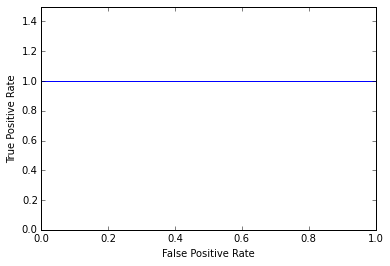

fold 2 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[5 0]
 [0 5]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


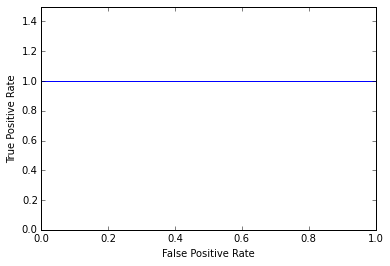

fold 3 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[4 0]
 [0 6]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


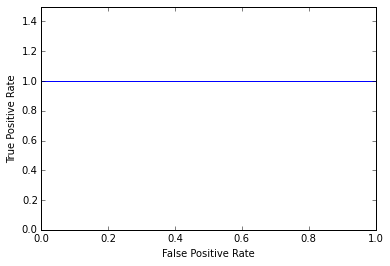

fold 4 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[5 0]
 [0 5]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


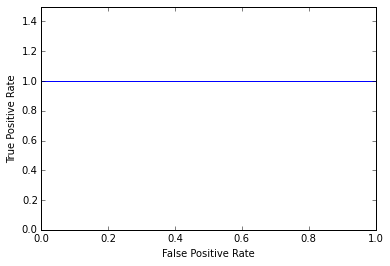

fold 5 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[6 0]
 [0 4]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


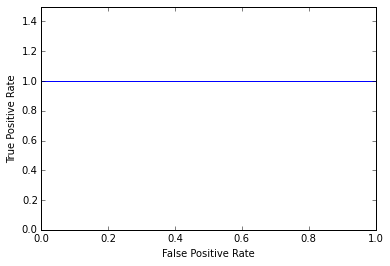

fold 6 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[3 0]
 [0 7]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


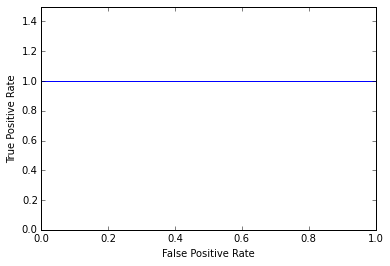

fold 7 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[6 0]
 [0 4]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


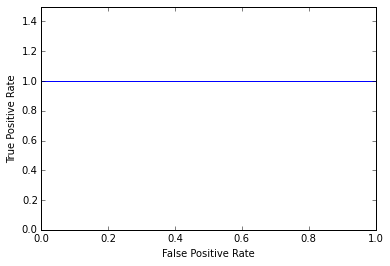

fold 8 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[6 0]
 [0 4]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


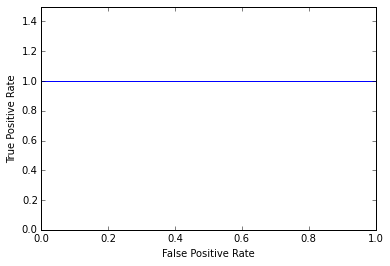

fold 9 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[3 0]
 [0 7]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


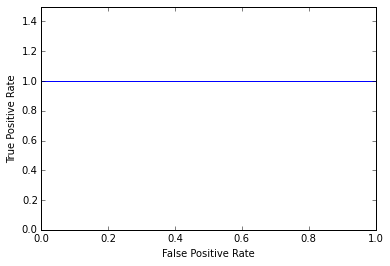

fold 10 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[4 0]
 [0 6]]
[ 0.  1.] [ 1.  1.]
Area under the curve: 1.0000


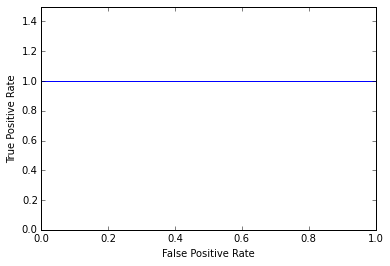

average cross validation accuracy, precision, recall, f1_score =1.0000, 1.0000, 1.0000, 1.0000

n Feature , n Class
fold 1 accuracy=0.8667, precision=0.8667, recall=0.8667, F-measure0.8667, confusion matrix=
[[4 0 0]
 [0 4 1]
 [0 1 5]]
fold 2 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[4 0 0]
 [0 6 0]
 [0 0 5]]
fold 3 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[7 0 0]
 [0 5 0]
 [0 0 3]]
fold 4 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[5 0 0]
 [0 5 0]
 [0 0 5]]
fold 5 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[2 0 0]
 [0 8 0]
 [0 0 5]]
fold 6 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[7 0 0]
 [0 4 0]
 [0 0 4]]
fold 7 accuracy=1.0000, precision=1.0000, recall=1.0000, F-measure1.0000, confusion matrix=
[[5 0 0]
 [0 6 0]
 [0 0 4]]
fold 8 accuracy=0.8667, precision=0.9048, re

In [11]:
def do_cross_validation(X, y, ndimension, classarray,n_folds, verbose=False):
    
    accuracies = []
    precisions =[]
    recalls=[]
    f1_scores=[]
    y_p=[]
    i=1;
    X1, Y1= read_dimension_class(X,y,ndimension,classarray)
    cv = KFold(len(Y1), n_folds, shuffle=True, random_state=5)
    for train_idx, test_idx in cv:
        muu_class = calc_muu(X1[train_idx], Y1[train_idx],classarray)
        sigma_class = calc_sigma(X1[train_idx], Y1[train_idx],muu_class,classarray)
        priors= prior_probability(Y1[train_idx], classarray)
        membership_class = membership(X1[test_idx], sigma_class, muu_class, priors)
        for a in membership_class:
            max_index, max_value = max(enumerate(a), key=operator.itemgetter(1))
            y_p.append(max_index+1)
        acc = accuracy_score(Y1[test_idx], y_p)
        c_matrix= confusion_matrix(Y1[test_idx], y_p)
        
        if(len(classarray)<=2):
            precision=precision_score(Y1[test_idx], y_p, average="binary")
            recall=recall_score(Y1[test_idx], y_p, average="binary")
            f_score=f1_score(Y1[test_idx], y_p, average="binary")
        elif(len(classarray)>2):
            precision=precision_score(Y1[test_idx], y_p, average="weighted")
            recall=recall_score(Y1[test_idx], y_p, average="weighted")
            f_score=f1_score(Y1[test_idx], y_p, average="weighted")
        if(verbose == True):
            #if(len(classarray)<=2):
            print('fold %d accuracy=%.4f, precision=%.4f, recall=%.4f, F-measure%.4f, confusion matrix=' % (i, acc, precision, recall, f_score));
            print c_matrix
    
        if(len(classarray)==2 and ndimension > 1):
            false_positive, true_positive, threshold = roc_curve(Y1[test_idx], y_p, pos_label=2)
            print false_positive, true_positive
            area=auc( false_positive , true_positive )
            print "Area under the curve: %0.4f" %area
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.5])
            plt.plot( false_positive, true_positive)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.show()
    
            #elif(len(classarray)>2):
            #    print('fold %d accuracy=%.4f, %.4f, %.4f, %.4f' % (i, acc, np.mean(precision), np.mean(recall), np.mean(f_score)));
        i=i+1;
        accuracies.append(acc)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f_score)
        y_p=[]
    avg=np.mean(accuracies);
    avg_precision=np.mean(precisions)
    avg_recall=np.mean(recalls)
    avg_f1_score=np.mean(f1_scores)
    return avg, avg_precision, avg_recall, avg_f1_score;
    
print("1 Feature , 2 Class")
print('average cross validation accuracy, precision, recall, f1_score =%.4f, %.4f, %.4f, %.4f' %
      do_cross_validation(X, Y,1, [1,2], n_folds=10, verbose=True))

print("\nn Feature , 2 Class")
print('average cross validation accuracy, precision, recall, f1_score =%.4f, %.4f, %.4f, %.4f' %
      do_cross_validation(X, Y,4, [1,2], n_folds=10, verbose=True))

print("\nn Feature , n Class")
print('average cross validation accuracy, precision, recall, f1_score =%.4f, %.4f, %.4f, %.4f' %
      do_cross_validation(X, Y,4, [1,2,3], n_folds=10, verbose=True))

In [160]:
def get_data():
    """ Download and unzip data."""
    urlretrieve('https://www.dropbox.com/s/xk4glpk61q3qrg2/imdb.tgz?dl=1', 'imdb.tgz')
    tar = tarfile.open("imdb.tgz")
    tar.extractall()
    tar.close()
    
get_data()

In [12]:
path = 'data'

In [13]:
def get_files(path):
    text_files = [path + "\\" + f for f in os.listdir(path) if f.endswith('.txt')]
    sorted(text_files);
    return text_files;

In [14]:
pos_train_files = get_files(path + os.sep + 'train' + os.sep + 'pos')
neg_train_files = get_files(path + os.sep + 'train' + os.sep + 'neg')
all_train_files = pos_train_files + neg_train_files

In [15]:
def get_true_labels(file_names):
    y=[];
    for f in file_names:
        if("pos" in f):
            y.append(1);
        elif("neg" in f):
            y.append(0);
    return np.array(y);

labels = get_true_labels(all_train_files)

In [16]:
def tokenize_with_punct(text):
    result='';
    if not text:
        return []
    string=text.lower();
    tokens = []
    tokens = re.findall(r"[\w]+|[^\s\w]", string, re.U);
    result=' '.join(tokens)
    tok=re.findall(r"[\w]+|[^\s\w]", result);
    return tok;

In [17]:
def tokenize_with_not(text):
    i=0;
    tokens = tokenize_with_punct(text);
    for t in tokens:
        if(t=="not"):
            if(i+1<=len(tokens)-1):
                tokens[i+1] = '%s_%s' % (t, tokens[i+1]);
            if(i+2<=len(tokens)-1):
                tokens[i+2] = '%s_%s' % (t, tokens[i+2]);
        i=i+1;
    return tokens;

In [18]:
def do_vectorize(filenames, tokenizer_fn=tokenize_with_not, min_df=2,
                 max_df=.7, binary=True, ngram_range=(1,1)):
    vec = CountVectorizer(input='filename', encoding='utf-8', tokenizer=tokenize_with_not,ngram_range=ngram_range, 
                   analyzer=u'word', max_df=max_df, min_df=min_df,binary=binary, dtype=int);
    vect=vec.fit_transform(filenames)
    return(vect, vec);

matrix, vec = do_vectorize(all_train_files, binary=False)

In [19]:
pos_test_files = get_files(path + os.sep + 'test' + os.sep + 'pos')
neg_test_files = get_files(path + os.sep + 'test' + os.sep + 'neg')
all_test_files = pos_test_files + neg_test_files
X_test = vec.transform(all_test_files)
y_test = np.array([1] * len(pos_test_files) + [0] * len(neg_test_files))

In [20]:
def get_alpha(x, y):
    m_class_pos=0;
    m_class_neg=0;
    alpha_class=[];
    alpha_class_pos=[];
    alpha_class_neg=[];
    alpha_sum_pos=0;
    alpha_sum_neg=0;
    for a in y:
        if a==1:
            m_class_pos=m_class_pos+1;
        else:
            m_class_neg=m_class_neg+1;
    for x_col in range(x.shape[1]):
        for x_row in range(x.shape[0]):
            if x_col in x[x_row].indices:
                if(y[x_row]==1):
                    alpha_sum_pos=alpha_sum_pos+1;
                else:
                    alpha_sum_neg=alpha_sum_neg+1;
        alpha_class_pos.append( (1.*alpha_sum_pos+1) / (m_class_pos+2) );
        alpha_class_neg.append( (1.*alpha_sum_neg+1) / (m_class_neg+2) );
        alpha_sum_pos=0;
        alpha_sum_neg=0;
    alpha_class.append(alpha_class_pos);
    alpha_class.append(alpha_class_neg)
    return alpha_class;

In [21]:
def get_alpha_binomial(x, y):
    m_class_pos=0;
    m_class_neg=0;
    alpha_class=[];
    alpha_class_pos=[];
    alpha_class_neg=[];
    alpha_sum_pos=0;
    alpha_sum_neg=0;
    for a in y:
        if a==1:
            m_class_pos=m_class_pos+1;
        else:
            m_class_neg=m_class_neg+1;
    for x_col in range(x.shape[1]):
        for x_row in range(x.shape[0]):
            if x_col in x[x_row].indices:
                if(y[x_row]==1):
                    alpha_sum_pos=alpha_sum_pos+x[x_row, x_col];
                else:
                    alpha_sum_neg=alpha_sum_neg+x[x_row, x_col];
        alpha_class_pos.append( (1.* alpha_sum_pos+1) / (m_class_pos+2));
        alpha_class_neg.append( (1.* alpha_sum_neg+1) / (m_class_neg+2));
        alpha_sum_pos=0;
        alpha_sum_neg=0;
    alpha_class.append(alpha_class_pos);
    alpha_class.append(alpha_class_neg)
    return alpha_class;

In [22]:
def get_priors(y):
    prior_class=[];
    m_class_pos=0;
    m_class_neg=0;
    for a in y:
        if a==1:
            m_class_pos=m_class_pos+1;
        else:
            m_class_neg=m_class_neg+1;
    prior_class.append(1.* m_class_pos / y.shape[0]);
    prior_class.append(1.* m_class_neg / y.shape[0]);
    return prior_class;

In [23]:
def membership_nb_B(x, alpha_class, prior_class):
    membership_pos=0;
    membership_neg=0;
    membership=[];
    for i in range(x.shape[0]):
        for a in x[i].indices:
            if(alpha_class[0][a]>0):
                membership_pos=membership_pos+math.log(alpha_class[0][a]);
            if(alpha_class[1][a]>0):
                membership_neg=membership_neg+math.log(alpha_class[1][a]);
        membership_pos=membership_pos*prior_class[0];
        membership_neg=membership_neg*prior_class[1];
        membership.append([membership_pos, membership_neg]);
        membership_pos=0;
        membership_neg=0;
    return membership;        

In [34]:
alpha_class = get_alpha(matrix, labels)

In [54]:
prior_class= get_priors(labels)

Bernoulli Feature
fold 1 accuracy=0.7500, precision=0.9000, recall=0.5000, F-measure0.6429, confusion matrix=
[[21  1]
 [ 9  9]]
fold 2 accuracy=0.8750, precision=0.9375, recall=0.7895, F-measure0.8571, confusion matrix=
[[20  1]
 [ 4 15]]
fold 3 accuracy=0.7250, precision=1.0000, recall=0.3889, F-measure0.5600, confusion matrix=
[[22  0]
 [11  7]]
fold 4 accuracy=0.7750, precision=0.7273, recall=1.0000, F-measure0.8421, confusion matrix=
[[ 7  9]
 [ 0 24]]
fold 5 accuracy=0.7500, precision=0.7500, recall=0.7500, F-measure0.7500, confusion matrix=
[[15  5]
 [ 5 15]]
fold 6 accuracy=0.7750, precision=0.9167, recall=0.5789, F-measure0.7097, confusion matrix=
[[20  1]
 [ 8 11]]
fold 7 accuracy=0.7500, precision=0.6875, recall=1.0000, F-measure0.8148, confusion matrix=
[[ 8 10]
 [ 0 22]]
fold 8 accuracy=0.6500, precision=1.0000, recall=0.1765, F-measure0.3000, confusion matrix=
[[23  0]
 [14  3]]
fold 9 accuracy=0.7500, precision=1.0000, recall=0.4737, F-measure0.6429, confusion matrix=
[[

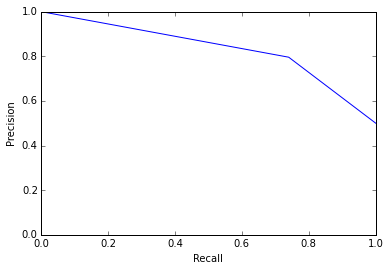

Area under the ROC curve: 0.7750


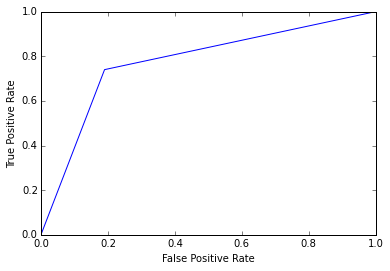

Binomial Feature
fold 1 accuracy=0.7500, precision=0.7857, recall=0.6111, F-measure0.6875, confusion matrix=
[[19  3]
 [ 7 11]]
fold 2 accuracy=0.9000, precision=0.8947, recall=0.8947, F-measure0.8947, confusion matrix=
[[19  2]
 [ 2 17]]
fold 3 accuracy=0.7000, precision=0.8750, recall=0.3889, F-measure0.5385, confusion matrix=
[[21  1]
 [11  7]]
fold 4 accuracy=0.7500, precision=0.7188, recall=0.9583, F-measure0.8214, confusion matrix=
[[ 7  9]
 [ 1 23]]
fold 5 accuracy=0.7500, precision=0.6786, recall=0.9500, F-measure0.7917, confusion matrix=
[[11  9]
 [ 1 19]]
fold 6 accuracy=0.7750, precision=0.7778, recall=0.7368, F-measure0.7568, confusion matrix=
[[17  4]
 [ 5 14]]
fold 7 accuracy=0.7500, precision=0.6875, recall=1.0000, F-measure0.8148, confusion matrix=
[[ 8 10]
 [ 0 22]]
fold 8 accuracy=0.7750, precision=0.8333, recall=0.5882, F-measure0.6897, confusion matrix=
[[21  2]
 [ 7 10]]
fold 9 accuracy=0.7250, precision=0.7857, recall=0.5789, F-measure0.6667, confusion matrix=
[[1

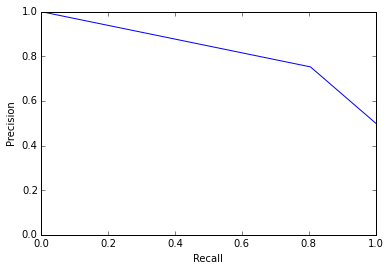

Area under the ROC curve: 0.7700


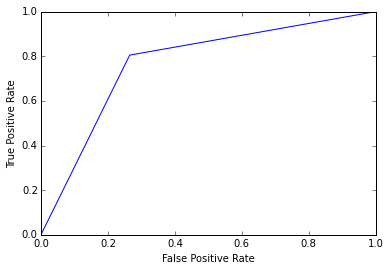

In [139]:
def do_cross_validation_NB(matrix, labels, X_test, y_test, feature, n_folds=10):
    accuracies = []
    precisions =[]
    recalls=[]
    f1_scores=[]
    y_p=[]
    fold_number=1;
    cv = KFold(len(labels), n_folds, shuffle=True, random_state=5)
    for train_idx, test_idx in cv:
        if(feature=='bernoulli'):
            alpha_class = get_alpha(matrix[train_idx], labels[train_idx])
        elif(feature=='binomial'):
            alpha_class = get_alpha_binomial(matrix[train_idx], labels[train_idx])
        prior_class= get_priors(labels[train_idx])
        membership=membership_nb_B(matrix[test_idx], alpha_class, prior_class)
        pos=0;
        neg=0;
        y_predicted=[];
        for i in range(matrix[test_idx].shape[0]):
            if(membership[i][0]>membership[i][1]):
                y_predicted.append(1);
            elif(membership[i][0]<membership[i][1]):
                y_predicted.append(0);
        acc = accuracy_score(labels[test_idx], y_predicted)
        c_matrix= confusion_matrix(labels[test_idx], y_predicted)
        precision=precision_score(labels[test_idx], y_predicted, average="binary")
        recall=recall_score(labels[test_idx], y_predicted, average="binary")
        f_score=f1_score(labels[test_idx], y_predicted, average="binary")
        print('fold %d accuracy=%.4f, precision=%.4f, recall=%.4f, F-measure%.4f, confusion matrix=' % (fold_number, acc, precision, recall, f_score));
        print c_matrix
        accuracies.append(acc)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f_score)
        fold_number=fold_number+1;
    avg=np.mean(accuracies);
    avg_precision=np.mean(precisions)
    avg_recall=np.mean(recalls)
    avg_f1_score=np.mean(f1_scores)
    if(feature=='bernoulli'):
        alpha_class = get_alpha(matrix, labels)
    elif(feature=='binomial'):
        alpha_class = get_alpha_binomial(matrix, labels)
    prior_class= get_priors(labels)
    membership=membership_nb_B(X_test, alpha_class, prior_class)
    pos=0;
    neg=0;
    y_predicted=[];
    for i in range(X_test.shape[0]):
        if(membership[i][0]>membership[i][1]):
            y_predicted.append(1);
        elif(membership[i][0]<membership[i][1]):
            y_predicted.append(0);
    acc1 = accuracy_score(y_test, y_predicted)
    c_matrix1= confusion_matrix(y_test, y_predicted)
    precision1=precision_score(y_test, y_predicted, average="binary")
    recall1=recall_score(y_test, y_predicted, average="binary")
    f_score1=f1_score(y_test, y_predicted, average="binary")
    return avg, avg_precision, avg_recall, avg_f1_score, acc1, c_matrix1, precision1, recall1, f_score1, y_predicted;

matrix, vec = do_vectorize(all_train_files, binary=True)
print("Bernoulli Feature")
accuracy, precision, recall, f_1_score, acc1, c_matrix1, precision1, recall1, f_score1, y_predicted = do_cross_validation_NB(matrix, labels, X_test, y_test,'bernoulli', n_folds=10)

print 'average cross validation accuracy, precision, recall, f1_score =%.4f, %.4f, %.4f, %.4f' %(accuracy, precision, recall, f_1_score )
print 'overall accuracy, precision, recall, f1_score, confusion matrix =%.4f, %.4f, %.4f, %.4f' %(acc1, precision1, recall1, f_score1)
print c_matrix1
precision_plot, recall_plot, threshold = precision_recall_curve(y_test, y_predicted)
area=average_precision_score(y_test, y_predicted)
print "Area under the PR curve: %0.4f" %area
plt.plot(recall_plot, precision_plot)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_predicted)
area=auc(fpr, tpr)
print "Area under the ROC curve: %0.4f" %area
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

matrix, vec = do_vectorize(all_train_files, binary=False)
print("Binomial Feature")
accuracy, precision, recall, f_1_score, acc1, c_matrix1, precision1, recall1, f_score1, y_predicted = do_cross_validation_NB(matrix, labels, X_test, y_test,'binomial', n_folds=10)

print 'average cross validation accuracy, precision, recall, f1_score =%.4f, %.4f, %.4f, %.4f' % (accuracy, precision, recall, f_1_score )
print 'overall accuracy, precision, recall, f1_score, confusion matrix =%.4f, %.4f, %.4f, %.4f' % (acc1, precision1, recall1, f_score1)
print c_matrix1
precision_plot, recall_plot, threshold = precision_recall_curve(y_test, y_predicted)
area=average_precision_score(y_test, y_predicted)
print "Area under the PR curve: %0.4f" %area
plt.plot(recall_plot, precision_plot)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_predicted)
area=auc(fpr, tpr)
print "Area under the ROC curve: %0.4f" %area
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
        


#Built in Model

In [32]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(matrix, labels)
y_predict= clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.77500000000000002

In [67]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(matrix, labels)
y_predict= clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.77500000000000002